In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('./failure-dataset-a5.csv')

In [100]:
data.head()

,T,FC,E,F,C
0,1,2,0.05,1.3,0.5
1,2,11,1.00,17.8,2.8
2,3,2,0.19,5.0,1.0
3,4,4,0.41,1.5,0.5
4,5,3,0.32,1.5,0.5


# Calculate Overall Failure Rate, MTTF and Reliability at Interval T = 31

In [101]:
# Failure rate = Total Number of Failures / Number of Intervals 
failure_rate = data['FC'].sum() / data['T'].count()
print("Failure Rate:", failure_rate)

Failure Rate: 2.967741935483871


In [102]:
# MTTF = 1 / Failure Rate
MTTF = 1 / failure_rate
print("MTTF:", MTTF)

MTTF: 0.33695652173913043


In [122]:
# Reliability = e ^ (- failure_rate * t)
reliability = np.exp(-failure_rate*(data['T'].count()))
print("Reliability:", reliability)

Reliability: 1.1089390193121365e-40


# Determine Useful Range of Data

## Calculate the Laplace Factors

The Laplace factor \( u(k) \) is given by the formula:

$$
u(k) = \frac{\left( \sum_{i=1}^{k} (i - 1) \cdot n(i) \right) - \left( \frac{k - 1}{2} \cdot \sum_{i=1}^{k} n(i) \right)}{\sqrt{k^2 - \frac{1}{12} \cdot \sum_{i=1}^{k} n(i)}}
$$

Where:
- \( n(i) \) is the number of failures observed during the time interval \( i \),
- \( k \) is the total number of time intervals considered (up to the current time interval \( T \)),
- The time period is divided into \( k \) equal intervals.



In [103]:
# List to store the Laplace factors
laplace_factors = []

# Calculate the Laplace factor for each row
for k in range(1, len(data) + 1):  # k corresponds to each time interval (row)
    # Calculate the sums for the formula
    n_i = data['FC'][:k].values  # Failure count up to the k-th row (n(i) for i=1 to k)
    T_i = data['T'][:k].values   # Time intervals up to the k-th row
    
    # Sum of (i-1)*n(i)
    sum_1 = np.sum((np.arange(1, k+1) - 1) * n_i)
    
    # Sum of n(i)
    sum_n_i = np.sum(n_i)
    
    # Numerator: sum_1 - ((k-1)/2)*sum_n_i
    numerator = sum_1 - ((k - 1) / 2) * sum_n_i
    
    # Denominator: sqrt(k^2 - (1/12)*sum_n_i)
    denominator = np.sqrt(k**2 - (1 / 12) * sum_n_i)
    
    # Calculate the Laplace factor
    if denominator != 0:
        laplace_factor = numerator / denominator
    else:
        laplace_factor = np.nan  # Handle case where denominator is 0
    
    # Append the calculated Laplace factor to the list
    laplace_factors.append(laplace_factor)

# Add the Laplace factors to the DataFrame
data['Laplace Factor'] = laplace_factors

# Display the updated DataFrame
print(data)


     T  FC       E     F     C  Laplace Factor
0    1   2  0.0500   1.3   0.5        0.000000
1    2  11  1.0000  17.8   2.8        2.634930
2    3   2  0.1900   5.0   1.0        0.000000
3    4   4  0.4100   1.5   0.5       -0.395056
4    5   3  0.3200   1.5   0.5       -1.038815
5    6   1  0.6100   3.0   1.0       -2.312399
6    7   1  0.3200   3.0   0.5       -3.209030
7    8   2  1.8300   8.0   2.5       -3.433622
8    9   4  3.0100  30.0   3.0       -2.708797
9   10   0  1.7900   9.0   3.0       -3.949684
10  11   4  3.1700  25.0   6.0       -3.127746
11  12   1  3.4000  15.0   4.0       -3.830659
12  13   3  4.2000  15.0   4.0       -3.494432
13  14   0  1.2000   2.0   1.0       -4.608811
14  15   1  0.0531   4.0   1.0       -5.103661
15  16   1  0.0619  20.0   0.0       -5.536161
16  17   2  0.1580   1.0   0.5       -5.444836
17  18   1  0.0810   1.0   0.5       -5.837928
18  19   8  1.0460  32.0   2.0       -2.858984
19  20   9  1.7500  32.0   5.0        0.301893
20  21   6  2

## Plot Laplace Factor 

Negative values of the Laplace factor u(k) indicate a decreasing failure intensity or reliability growth.  

Positive values of the Laplace factor u(k) indicate an increasing failure intensity, or reliability decrease.   

Values between -2 and +2 indicate stable reliability, and values less than -2 are useful data for the reliability growth model. 


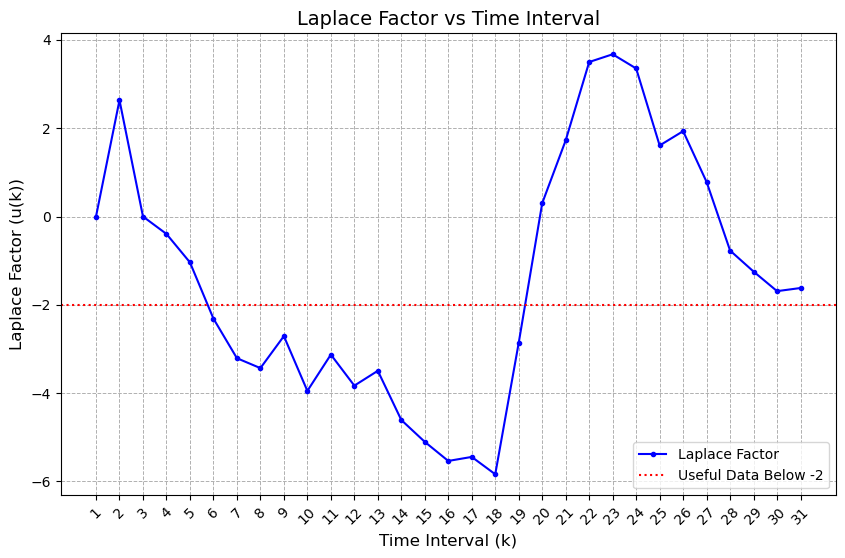

In [104]:
plt.figure(figsize=(10, 6)) 
plt.plot(data['T'], data['Laplace Factor'], marker='o', linestyle='-', color='b', label='Laplace Factor', markersize=3)

# Add dotted line at Laplace factor -2
plt.axhline(y=-2, color='r', linestyle=':', label='Useful Data Below -2')


# Add labels and title to the plot
plt.xlabel('Time Interval (k)', fontsize=12)
plt.ylabel('Laplace Factor (u(k))', fontsize=12)
plt.title('Laplace Factor vs Time Interval', fontsize=14)
plt.xticks(data['T'], rotation=45) 

plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.legend(loc='lower right')

plt.show()


The plot of the Laplace factors shows that there was a decrease in reliability in time intervals 1 and 2. Between time intervals 3 and 18, the reliability generally was growing with a few small decreases. Then at time interval 18 there was another decrease in reliability until time interval 23, where the reliability grew again.   

The time intervals of useful data are between 6 and 19 (where the Laplace factor is below -2). 


# Plots With Full Data

## Display time-between-failures

In [105]:
data_for_plots = pd.read_excel('./failure-dataset-a5-for-plots.xlsx')

In [106]:
data_for_plots.head()

,Time Interval,Failure Number,Time Between Failure,Cumulative Time,Failures Per Time
0,1,1,0.500000,0.500000,1
1,1,2,0.500000,1.000000,2
2,2,3,0.090909,1.090909,1
3,2,4,0.090909,1.181818,2
4,2,5,0.090909,1.272727,3


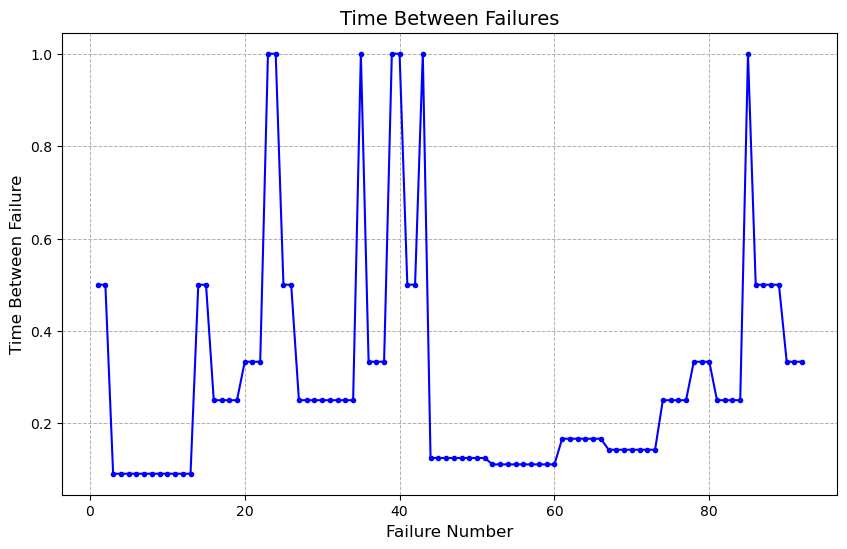

In [107]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots['Failure Number'], data_for_plots['Time Between Failure'], marker='o',linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Failure Number', fontsize=12)
plt.ylabel('Time Between Failure', fontsize=12)
plt.title('Time Between Failures', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display Cumulative Failures

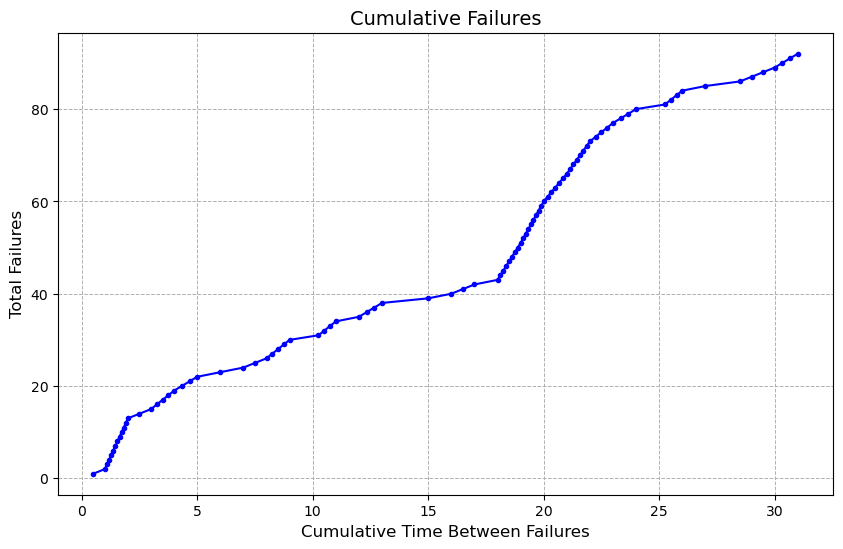

In [108]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots['Cumulative Time'], data_for_plots['Failure Number'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Total Failures', fontsize=12)
plt.title('Cumulative Failures', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display failure intensity

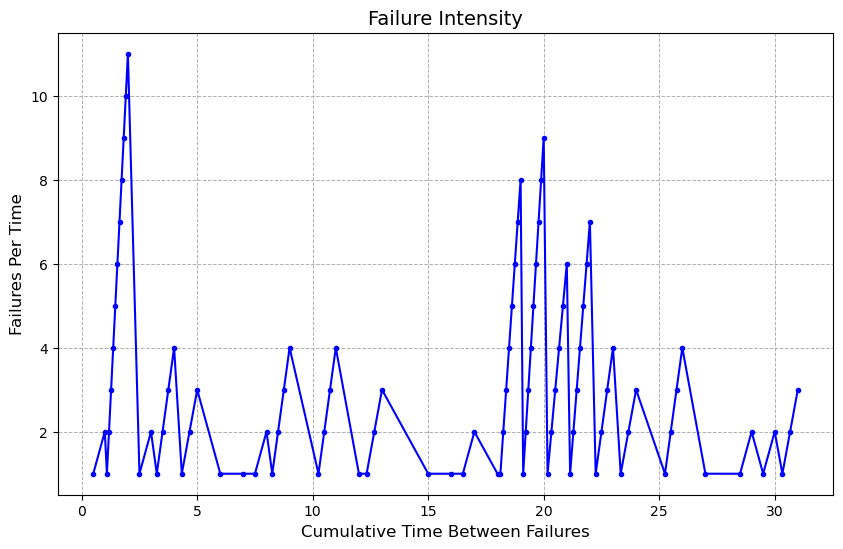

In [109]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots['Cumulative Time'], data_for_plots['Failures Per Time'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Failures Per Time', fontsize=12)
plt.title('Failure Intensity', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display reliability

In [111]:
data_for_plots['Failure Rate'] = data_for_plots['Failure Number'] / data_for_plots['Cumulative Time']
data_for_plots['Reliability'] = np.exp(-(data_for_plots['Failure Rate'])*(data_for_plots['Cumulative Time']))

In [112]:
data_for_plots.head(93)

,Time Interval,Failure Number,Time Between Failure,Cumulative Time,Failures Per Time,Failure Rate,Reliability
0,1,1,0.500000,0.500000,1,2.000000,3.678794e-01
1,1,2,0.500000,1.000000,2,2.000000,1.353353e-01
2,2,3,0.090909,1.090909,1,2.750000,4.978707e-02
3,2,4,0.090909,1.181818,2,3.384615,1.831564e-02
4,2,5,0.090909,1.272727,3,3.928571,6.737947e-03
...,...,...,...,...,...,...,...
87,30,88,0.500000,29.500000,1,2.983051,6.054602e-39
88,30,89,0.500000,30.000000,2,2.966667,2.227364e-39
89,31,90,0.333333,30.333333,1,2.967033,8.194013e-40
90,31,91,0.333333,30.666667,2,2.967391,3.014409e-40


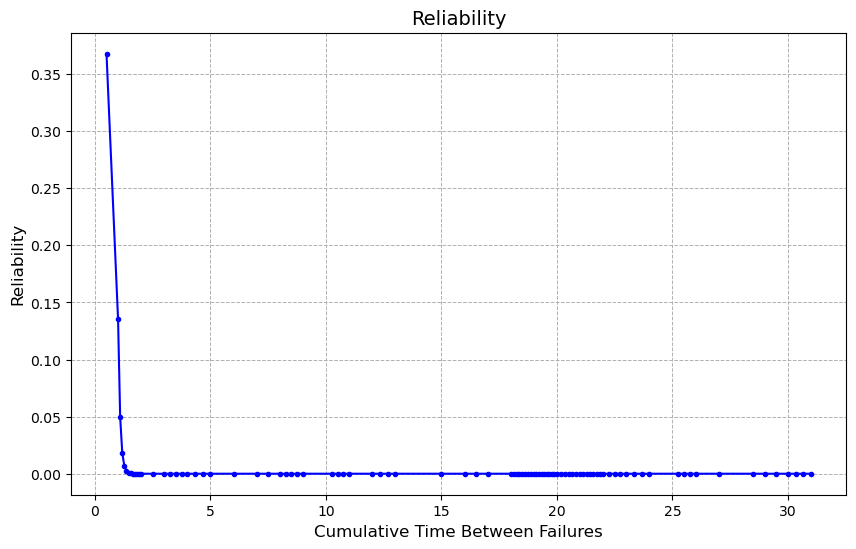

In [113]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots['Cumulative Time'], data_for_plots['Reliability'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Reliability', fontsize=12)
plt.title('Reliability', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display Failure Rate

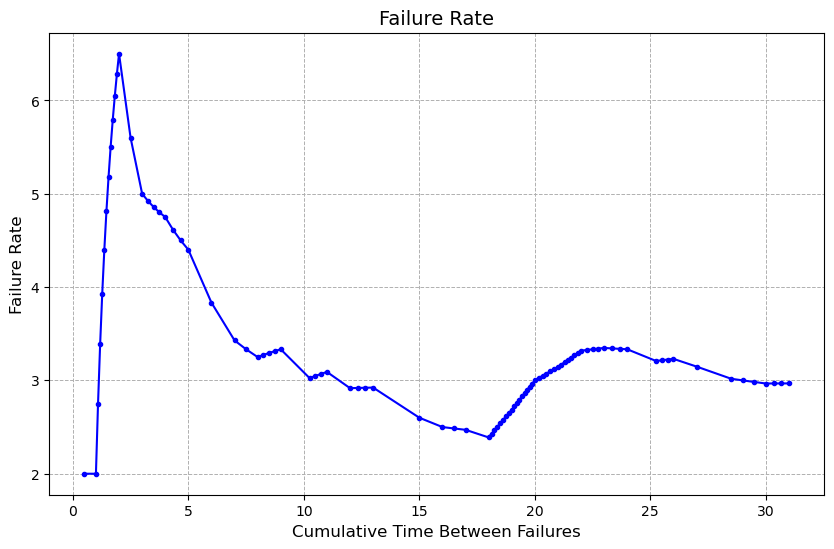

In [120]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots['Cumulative Time'], data_for_plots['Failure Rate'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.title('Failure Rate', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

# Plots With UseFul Range of Data

In [114]:
# Time Interval 6 to 19 is useful range 
data_for_plots_useful_range = data_for_plots[(data_for_plots['Time Interval'] >= 6) & (data_for_plots['Time Interval'] <= 19)]

print(data_for_plots_useful_range.head())

    Time Interval  Failure Number  Time Between Failure  Cumulative Time  \
22              6              23                  1.00             6.00   
23              7              24                  1.00             7.00   
24              8              25                  0.50             7.50   
25              8              26                  0.50             8.00   
26              9              27                  0.25             8.25   

    Failures Per Time  Failure Rate   Reliability  
22                  1      3.833333  1.026188e-10  
23                  1      3.428571  3.775135e-11  
24                  1      3.333333  1.388794e-11  
25                  2      3.250000  5.109089e-12  
26                  1      3.272727  1.879529e-12  


## Display time-between-failures

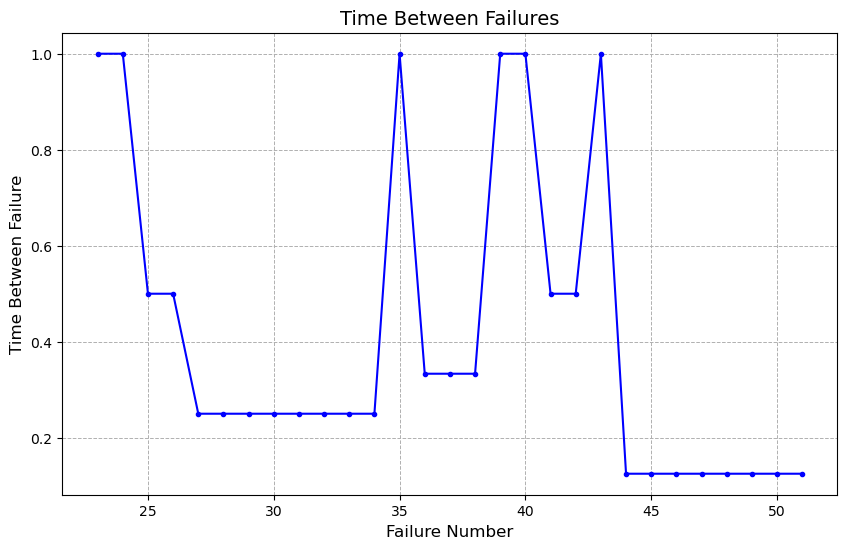

In [115]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots_useful_range['Failure Number'], data_for_plots_useful_range['Time Between Failure'], marker='o',linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Failure Number', fontsize=12)
plt.ylabel('Time Between Failure', fontsize=12)
plt.title('Time Between Failures', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display Cumulative Failures

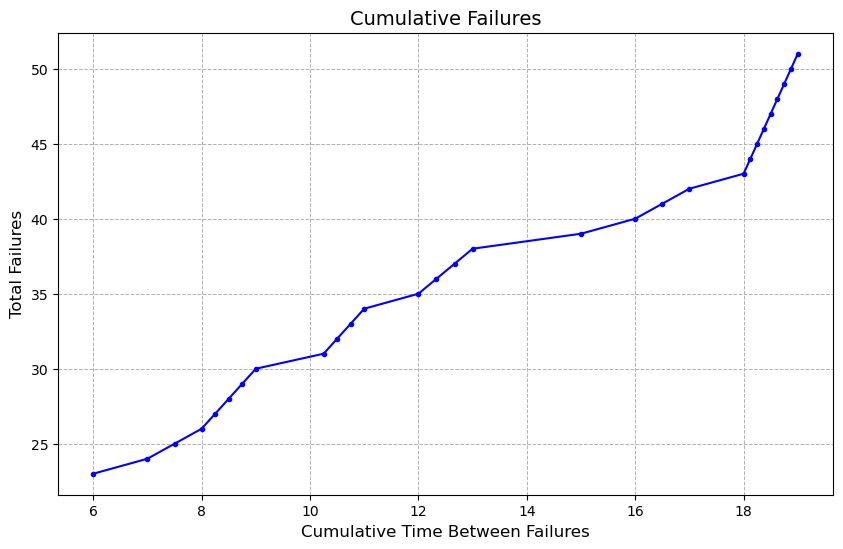

In [116]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots_useful_range['Cumulative Time'], data_for_plots_useful_range['Failure Number'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Total Failures', fontsize=12)
plt.title('Cumulative Failures', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display failure intensity

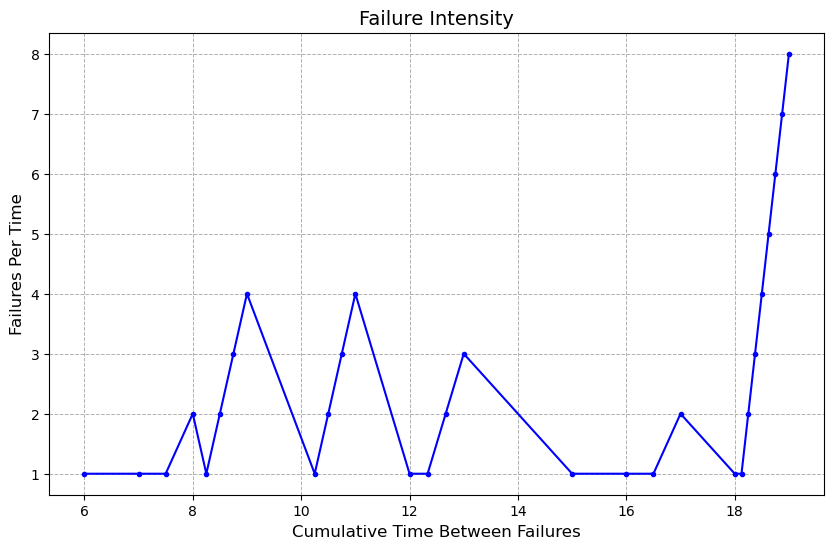

In [117]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots_useful_range['Cumulative Time'], data_for_plots_useful_range['Failures Per Time'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Failures Per Time', fontsize=12)
plt.title('Failure Intensity', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display reliability

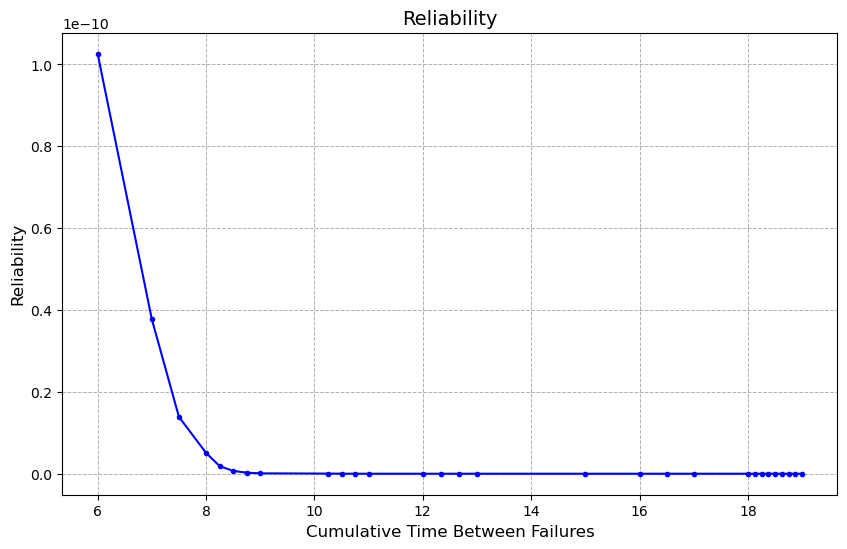

In [118]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots_useful_range['Cumulative Time'], data_for_plots_useful_range['Reliability'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Reliability', fontsize=12)
plt.title('Reliability', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()

## Display Failure Rate

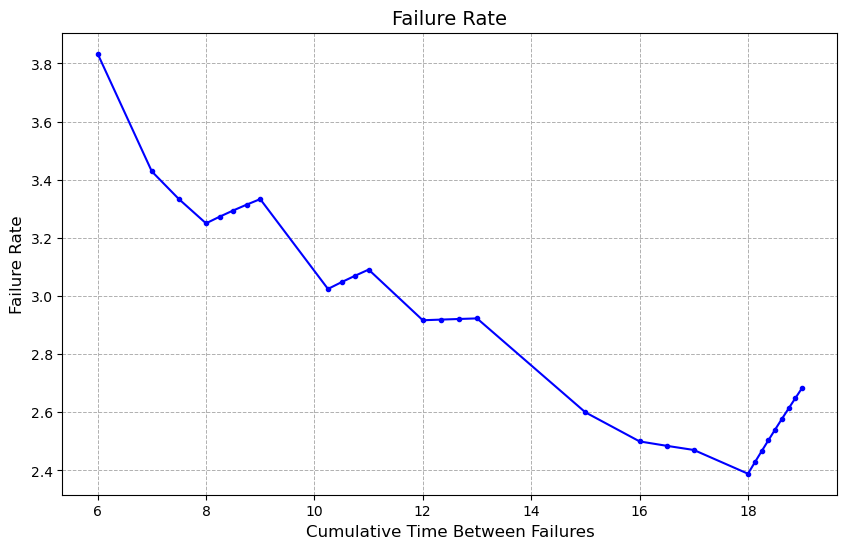

In [119]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_for_plots_useful_range['Cumulative Time'], data_for_plots_useful_range['Failure Rate'], marker='o', linestyle='-', color='b', markersize=3)

# Add labels and title to the plot
plt.xlabel('Cumulative Time Between Failures', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.title('Failure Rate', fontsize=14)


plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.show()